In [1]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap, Polygon

sns.set()
%matplotlib inline

In [3]:
from config.resources import path_to

In [4]:
path_to_data = path_to['filtered_data'].format('series_a', 'angel_group')
filtered_investments_df = pd.read_csv(path_to_data, encoding='latin1')

In [5]:
filtered_investments_df.columns

Index([u'funding_round_uuid', u'investor_uuid', u'is_lead_investor',
       u'investor_name', u'country_code_investors', u'state_code_investors',
       u'city_investors', u'investor_type', u'company_uuid',
       u'country_code_investees', u'state_code_investees', u'city_investees',
       u'investment_type', u'raised_amount_usd', u'latitude_investors',
       u'longitude_investors', u'confidence_investors', u'msa_name_investors',
       u'msa_code_investors', u'latitude_investees', u'longitude_investees',
       u'confidence_investees', u'msa_name_investees', u'msa_code_investees'],
      dtype='object')

In [10]:
investment_loc_fields = ['latitude_investees', 'longitude_investees', 'msa_name_investees', 'latitude_investors', 'longitude_investors', 'msa_name_investors']
investment_loc_df = filtered_investments_df[ investment_loc_fields ]
investment_loc_df.dropna().drop_duplicates()
investment_loc_df.shape

(1092, 6)

In [83]:
investment_loc_by_msa = investment_loc_df.groupby(['msa_name_investees', 'msa_name_investors'])
graph_df = investment_loc_by_msa.mean()
graph_df['count'] = investment_loc_by_msa.size()
# graph_df['count'] = graph_df['count'] / graph_df['count'].max()
# print(graph_df['count'].max())

graph_df.head()

latitude_investees  \
msa_name_investees       msa_name_investors                                                  
Akron, OH Metro Area     Seattle-Tacoma-Bellevue, WA Metro Area                  41.343109   
Ann Arbor, MI Metro Area Ann Arbor, MI Metro Area                                42.282101   
                         Chicago-Naperville-Elgin, IL-IN-WI Metro Area           42.282101   
                         Holland, MI Micro Area                                  42.282101   
                         Lansing-East Lansing, MI Metro Area                     42.282101   

                                                                        longitude_investees  \
msa_name_investees       msa_name_investors                                                   
Akron, OH Metro Area     Seattle-Tacoma-Bellevue, WA Metro Area                  -81.528763   
Ann Arbor, MI Metro Area Ann Arbor, MI Metro Area                                -83.748466   
                         Chicago-Naperville-Elgin, IL-IN-WI Metro Area           -83.748466   
                         Holland, MI Micro Area                                  -83.748466   
                         Lansing-East Lansing, MI Metro Area                     -83.748466   

                                                                        latitude_investors  \
msa_name_investees       msa_name_investors                                                  
Akron, OH Metro Area     Seattle-Tacoma-Bellevue, WA Metro Area                  47.603569   
Ann Arbor, MI Metro Area Ann Arbor, MI Metro Area                                42.282101   
                         Chicago-Naperville-Elgin, IL-IN-WI Metro Area           41.884251   
                         Holland, MI Micro Area                                  42.636341   
                         Lansing-East Lansing, MI Metro Area                     42.737499   

                                                                        longitude_investors  \
msa_name_investees       msa_name_investors                                                   
Akron, OH Metro Area     Seattle-Tacoma-Bellevue, WA Metro Area                 -122.329453   
Ann Arbor, MI Metro Area Ann Arbor, MI Metro Area                                -83.748466   
                         Chicago-Naperville-Elgin, IL-IN-WI Metro Area           -87.632446   
                         Holland, MI Micro Area                                  -86.210548   
                         Lansing-East Lansing, MI Metro Area                     -84.483780   

                                                                        count  
msa_name_investees       msa_name_investors                                    
Akron, OH Metro Area     Seattle-Tacoma-Bellevue, WA Metro Area             1  
Ann Arbor, MI Metro Area Ann Arbor, MI Metro Area                           3  
                         Chicago-Naperville-Elgin, IL-IN-WI Metro Area      1  
                         Holland, MI Micro Area                             1  
                         Lansing-East Lansing, MI Metro Area                1

In [35]:
graph_df.index.tolist()

[(u'Akron, OH Metro Area', u'Seattle-Tacoma-Bellevue, WA Metro Area'),
 (u'Ann Arbor, MI Metro Area', u'Ann Arbor, MI Metro Area'),
 (u'Ann Arbor, MI Metro Area',
  u'Chicago-Naperville-Elgin, IL-IN-WI Metro Area'),
 (u'Ann Arbor, MI Metro Area', u'Holland, MI Micro Area'),
 (u'Ann Arbor, MI Metro Area', u'Lansing-East Lansing, MI Metro Area'),
 (u'Ann Arbor, MI Metro Area',
  u'Los Angeles-Long Beach-Anaheim, CA Metro Area'),
 (u'Ann Arbor, MI Metro Area', u'Midland, MI Metro Area'),
 (u'Ann Arbor, MI Metro Area', u'Traverse City, MI Micro Area'),
 (u'Atlanta-Sandy Springs-Roswell, GA Metro Area',
  u'Atlanta-Sandy Springs-Roswell, GA Metro Area'),
 (u'Atlanta-Sandy Springs-Roswell, GA Metro Area',
  u'Auburn-Opelika, AL Metro Area'),
 (u'Atlanta-Sandy Springs-Roswell, GA Metro Area',
  u'Greenville-Anderson-Mauldin, SC Metro Area'),
 (u'Atlanta-Sandy Springs-Roswell, GA Metro Area',
  u'Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area'),
 (u'Austin-Round Rock, TX Metro Area',


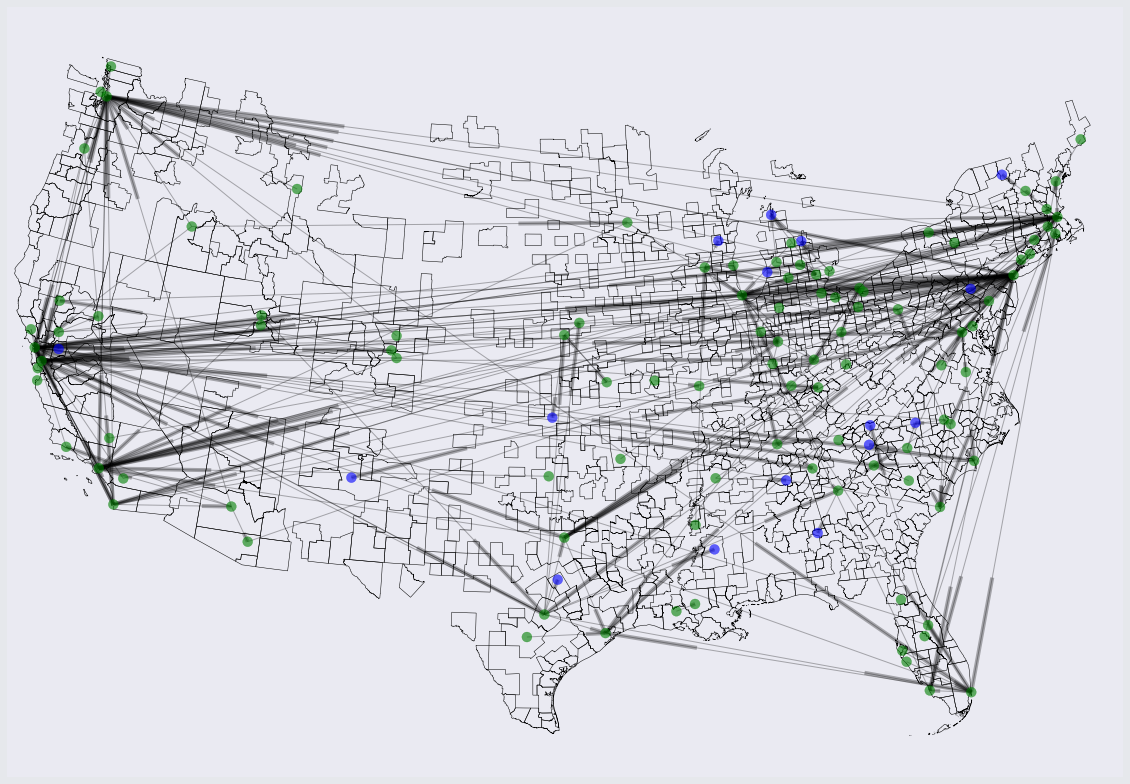

In [89]:
###### import networkx as nx
plt.ioff()
fig = plt.figure(figsize=(20,15))
m = Basemap(urcrnrlat=49.0,     # top
            urcrnrlon=-64.0,   # bottom
            llcrnrlat=22.0,     # left
            llcrnrlon=-119.0,   # right
            projection='lcc',
            lat_1=39,
            lon_0=-98
            )
fig.patch.set_facecolor('#e6e8ec')
m.readshapefile(path_to['shape_files'], 'msa', drawbounds=True)

src_lon, src_lat = graph_df['longitude_investors'].tolist(), graph_df['latitude_investors'].tolist()
dest_lon, dest_lat = graph_df['longitude_investees'].tolist(), graph_df['latitude_investees'].tolist()

src_x, src_y = m(src_lon, src_lat)
dest_x, dest_y = m(dest_lon, dest_lat)

G = nx.DiGraph()
G.add_edges_from(graph_df.index.tolist())

src_pos = { index[1]: tuple(m(row['longitude_investors'], row['latitude_investors'])) for index, row in graph_df.iterrows() }
dest_pos = { index[0]: tuple(m(row['longitude_investees'], row['latitude_investees'])) for index, row in graph_df.iterrows() }
pos = dict( src_pos.items() + dest_pos.items() )

#blue for investor, green for investment
src_colors = { index[1]: 'blue' for index, _ in graph_df.iterrows() }
dest_colors = { index[0]: 'green' for index, _ in graph_df.iterrows() }
colors = dict( src_colors.items() + dest_colors.items() )

nx.draw_networkx_nodes(G, pos, node_color=colors.values(), node_size=100, alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.show()